# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check to see how many null values are in each column.

In [8]:
# write pandas code here
movie.isnull().values.any()
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of each of the columns

In [9]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using the genres column create a set of all unique genres referenced in the column. Print unique genres.


In [10]:
# write pandas code here
unique_genre = movie.genres.str.split("|").sum()
unique_genre = set(unique_genre)
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation. dtype of the column should be boolean.

In [11]:
# write pandas code here
for g in unique_genre:
    movie[g] = movie.genres.map(lambda x: g in x.split('|'))
movie

,movieId,title,genres,Drama,Animation,Horror,Sci-Fi,Musical,Adventure,Comedy,...,Documentary,Thriller,War,Fantasy,Children,Mystery,(no genres listed),Crime,Western,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,False,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9739,193585,Flint (2017),Drama,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The movie year is included in the title text of each movie. Feel free to use a regex or string method for this.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [12]:
# write pandas code here
import re 
years = re.compile(r'\([0-9]{4}\)')
yearsLists = [years.findall(movie.title[i]) for i in range(len(movie))]
yearsLists
yearList = []
for years in yearsLists:
    try:
        yearList.append(years[0].replace("(","").replace(")",""))
    except: 
        yearList.append('NA')
movie['Year'] = yearList
movie

,movieId,title,genres,Drama,Animation,Horror,Sci-Fi,Musical,Adventure,Comedy,...,Thriller,War,Fantasy,Children,Mystery,(no genres listed),Crime,Western,Film-Noir,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,False,False,False,True,True,...,False,False,True,True,False,False,False,False,False,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,2017
9739,193585,Flint (2017),Drama,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2018


In [13]:
movie.groupby(['Year']).count()

,movieId,title,genres,Drama,Animation,Horror,Sci-Fi,Musical,Adventure,Comedy,...,Documentary,Thriller,War,Fantasy,Children,Mystery,(no genres listed),Crime,Western,Film-Noir
Year,,,,,,,,,,,,,,,,,,,,,
1902,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1903,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1908,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1915,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1916,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,274,274,274,274,274,274,274,274,274,274,...,274,274,274,274,274,274,274,274,274,274
2016,218,218,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218
2017,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# Q6.(.5 point) Using seaborn, plot a bar plot of total number of movies per year. Do you see any trend?

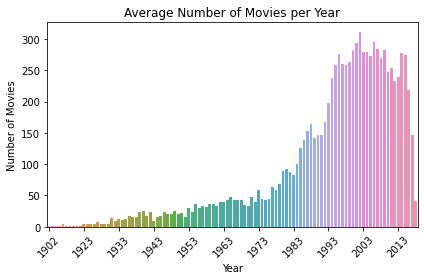

In [14]:
%matplotlib inline
moviesPerYear = movie.groupby(['Year']).size().drop("NA").reset_index().rename(columns={0: 'Number of Movies'})
#moviesPerYear
fig, ax = plt.subplots(1,1)
sns.barplot(x = 'Year', y='Number of Movies', data=moviesPerYear, ax=ax).set_title('Average Number of Movies per Year')
ax.set_xticklabels(moviesPerYear['Year'], rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.tight_layout()
plt.show()

There is a linear trend in total number of movies per year from 1902 to 1963, but then there is exponential growth unti 2003 and it begins tapering off and maybe even going downward.

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

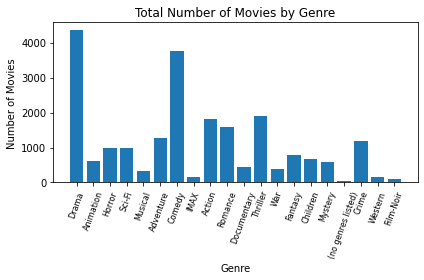

In [15]:
moviesByGenre = dict()
for genre in unique_genre: 
    moviesByGenre[genre] = int(movie[genre].sum())
moviesByGenre
genres = list(moviesByGenre.keys())
counts = list(moviesByGenre.values())
plt.bar(range(len(moviesByGenre)), counts, tick_label=genres)
plt.title('Total Number of Movies by Genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.xticks(fontsize=8, rotation=70)
plt.tight_layout()
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [16]:
 # write pandas code here
for i in range(len(movie)):
    text = movie['title'][i]
    text = text.replace(r'\([0-9]{4}\)', "")
    a = re.sub(r'\([0-9]{4}\)', '', text)
    movie.at[i, 'movie_title'] = a

movie.drop(['title'], axis=1, inplace = True)
movie

,movieId,genres,Drama,Animation,Horror,Sci-Fi,Musical,Adventure,Comedy,IMAX,...,War,Fantasy,Children,Mystery,(no genres listed),Crime,Western,Film-Noir,Year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,False,True,False,False,False,True,True,False,...,False,True,True,False,False,False,False,False,1995,Toy Story
1,2,Adventure|Children|Fantasy,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,1995,Jumanji
2,3,Comedy|Romance,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1995,Waiting to Exhale
4,5,Comedy,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1995,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,2017,Black Butler: Book of the Atlantic
9738,193583,Animation|Comedy|Fantasy,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,2017,No Game No Life: Zero
9739,193585,Drama,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2017,Flint
9740,193587,Action|Animation,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2018,Bungo Stray Dogs: Dead Apple


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [17]:
# Write your code here.
title_lengths=[]
for i in range(len(movie)): 
    title_lengths.append(len(movie['movie_title'][i].split()))
movie['title_length'] = title_lengths
movie

,movieId,genres,Drama,Animation,Horror,Sci-Fi,Musical,Adventure,Comedy,IMAX,...,Fantasy,Children,Mystery,(no genres listed),Crime,Western,Film-Noir,Year,movie_title,title_length
0,1,Adventure|Animation|Children|Comedy|Fantasy,False,True,False,False,False,True,True,False,...,True,True,False,False,False,False,False,1995,Toy Story,2
1,2,Adventure|Children|Fantasy,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,1995,Jumanji,1
2,3,Comedy|Romance,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,1995,Grumpier Old Men,3
3,4,Comedy|Drama|Romance,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,1995,Waiting to Exhale,3
4,5,Comedy,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,1995,Father of the Bride Part II,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,2017,Black Butler: Book of the Atlantic,6
9738,193583,Animation|Comedy|Fantasy,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,2017,No Game No Life: Zero,5
9739,193585,Drama,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2017,Flint,1
9740,193587,Action|Animation,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2018,Bungo Stray Dogs: Dead Apple,5


In [18]:
dataDict={}
for genre in list(unique_genre):
    temp_df = movie[movie[genre]==True].groupby(['Year'])['title_length'].mean().reset_index().rename(columns={'title_length': 'avg_title_length'})
    dataDict[genre]=temp_df
dataDict

{'Drama':     Year  avg_title_length
 0   1915          5.000000
 1   1916          6.000000
 2   1919          3.000000
 3   1921          2.000000
 4   1923          4.500000
 ..   ...               ...
 95  2015          2.267327
 96  2016          2.579710
 97  2017          2.422222
 98  2018          2.111111
 99    NA          1.500000
 
 [100 rows x 2 columns],
 'Animation':     Year  avg_title_length
 0   1908          3.000000
 1   1928          2.000000
 2   1937          6.000000
 3   1938          3.000000
 4   1939          2.000000
 ..   ...               ...
 69  2014          4.133333
 70  2015          2.894737
 71  2016          3.227273
 72  2017          4.500000
 73  2018          3.333333
 
 [74 rows x 2 columns],
 'Horror':     Year  avg_title_length
 0   1920         10.000000
 1   1922          6.000000
 2   1923          5.000000
 3   1926          1.000000
 4   1927          5.000000
 ..   ...               ...
 78  2014          3.000000
 79  2015          

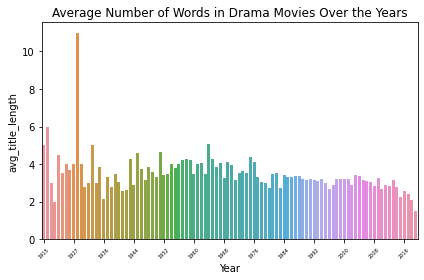

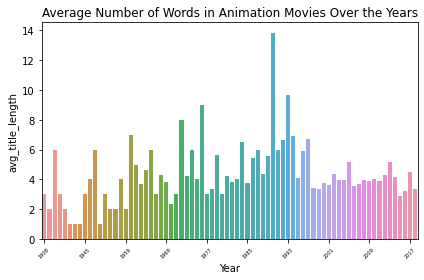

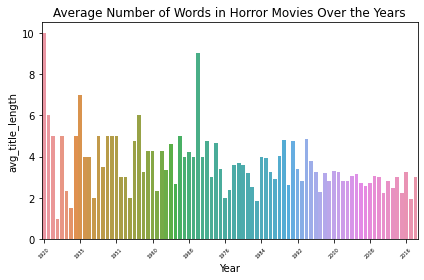

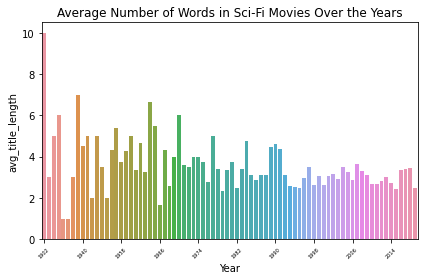

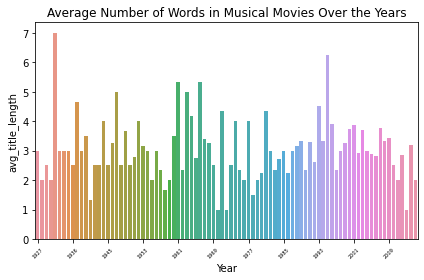

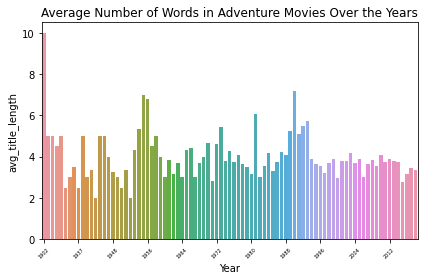

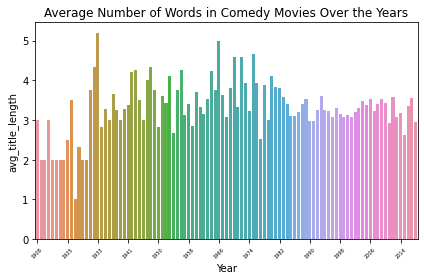

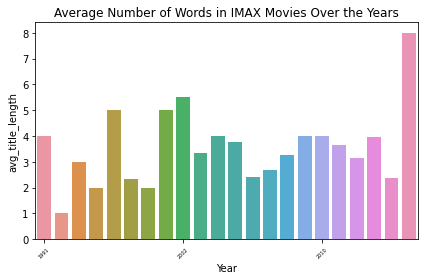

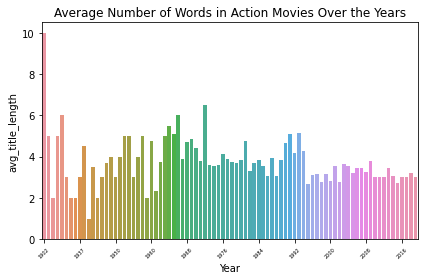

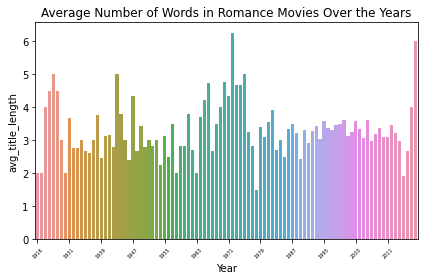

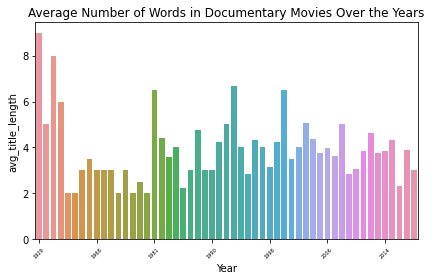

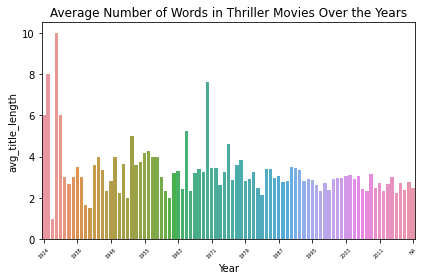

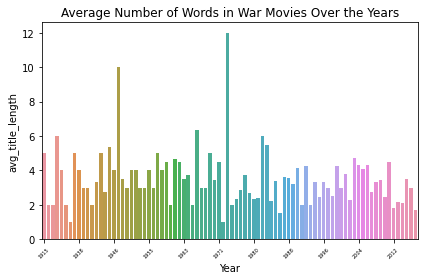

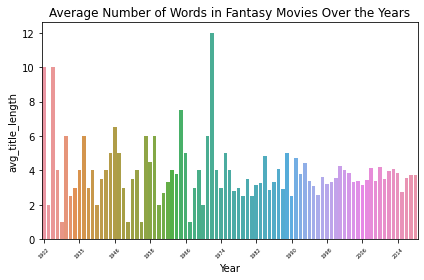

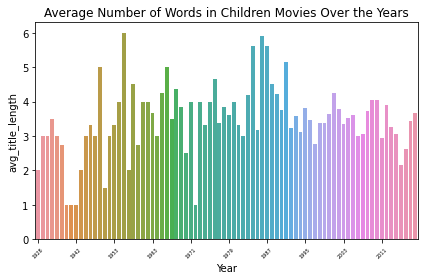

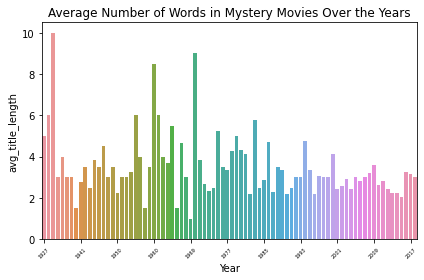

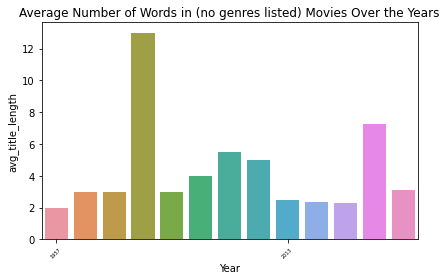

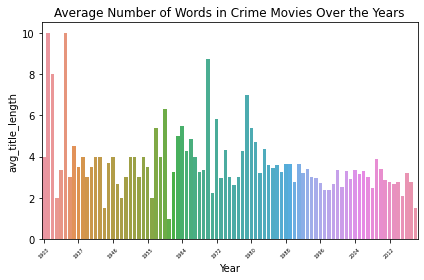

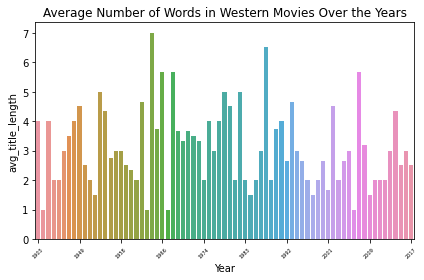

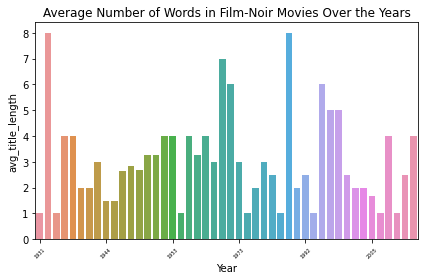

In [19]:
for genre in list(unique_genre):
    df = dataDict[genre]
    sns.barplot(data=df, x='Year', y='avg_title_length').set_title(f'Average Number of Words in {genre} Movies Over the Years')
    plt.xticks(np.arange(0, len(df), step=8),fontsize=5, rotation=45)
    plt.tight_layout()
    plt.show()